# Milestone 1 - Introduction to Buisness Analytics

Group:

Ashish Rakesh Chandra Kukreti (s230134), Ashutosh Dhaka (s222374), Daniel Lihotský (s231868), Natsuki Sato (s231459) and Oskar Fusager (s204383)

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Trips_2018.csv')

In [3]:
df.head(10)

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1
5,5,1602,2018-01-01 21:31:54.1920,2018-01-01 21:58:36.3530,72.0,40.767272,-73.993929,482.0,40.739355,-73.999318,30106,Subscriber,1968,1
6,6,722,2018-01-02 07:54:53.6460,2018-01-02 08:06:55.8720,72.0,40.767272,-73.993929,228.0,40.754601,-73.971879,32059,Subscriber,1978,1
7,7,434,2018-01-02 08:06:14.3310,2018-01-02 08:13:28.7670,72.0,40.767272,-73.993929,173.0,40.760683,-73.984527,30525,Subscriber,1983,1
8,8,366,2018-01-02 08:10:15.2550,2018-01-02 08:16:21.8960,72.0,40.767272,-73.993929,479.0,40.760193,-73.991255,27439,Subscriber,1974,1
9,9,324,2018-01-02 08:13:30.8960,2018-01-02 08:18:55.1200,72.0,40.767272,-73.993929,450.0,40.762272,-73.987882,30892,Subscriber,1947,1


# Section 1 - Introduction + Data analysis and visualization:



Introduction:

Citi Bike data has emerged as a valuable resource for analyzing urban mobility trends and understanding how people move through these bustling metropolises. The given data at hand can be clubbed into 4 categories and later can be used to address problems related to those sections.
The 1st set of features that we’ll be using for the prediction challenge will be mainly the Trip information. The given features include the starttime and stopttime, The IDs of the starting and terminating stations and the bike ID. As mentioned the data requires some pre conditioning before use. We addressed the starttime and formatted it according to the datetime convention.
Then we divided the dataset from January to October for training and the data for November and December is used for testing as mentioned.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17548339 entries, 0 to 17548338
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   tripduration             int64  
 2   starttime                object 
 3   stoptime                 object 
 4   start_station_id         float64
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_latitude     float64
 9   end_station_longitude    float64
 10  bikeid                   int64  
 11  usertype                 object 
 12  birth_year               int64  
 13  gender                   int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 1.8+ GB


Start time and dat are : str


In [5]:
type(df['starttime'].values[0])

str

In [6]:
df.shape

(17548339, 14)

Questions to ask:
Time of day people are riding bikes
week people are riding bikes

Look at the distribution of trip duration
Convert start time and stop time to datetime object
latitude and longitude ( geocoding)
user type distribution 
birth year distriution 


# Trip Duration

<AxesSubplot:>

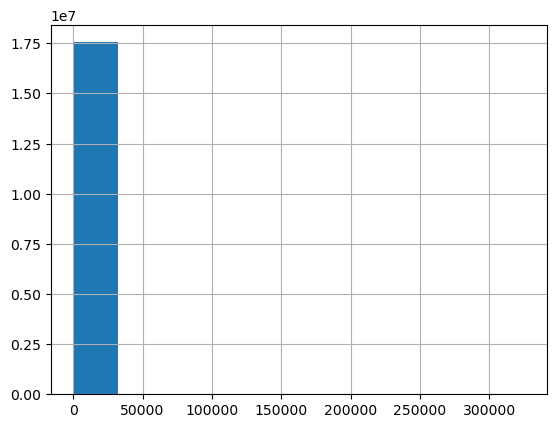

In [7]:
#in seconds
#df.tripduration.hist()

df['trip_minutes']=df.tripduration/60
df.trip_minutes

df.trip_minutes.hist()

24 hours in mins= 1440
48 hours in mins=2880
mins in 7 days=10080
mins in one month(30 days) = 43200


In [8]:
(df.trip_minutes.max()/60)/24
print("maximum rented duration ",round(((df.trip_minutes.max()/60)/24),2)," days", "or" ,round((df.trip_minutes.max()),2),"mins" )
(df.trip_minutes.min()/60)/24
print("minimum rented duration ",(df.trip_minutes.min())," mins")

print("average trip duration: ",df.trip_minutes.mean(),"mins")

maximum rented duration  225.81  days or 325167.48 mins
minimum rented duration  1.0166666666666666  mins
average trip duration:  16.479053295774552 mins


distribution of less than 30 mins

16174258

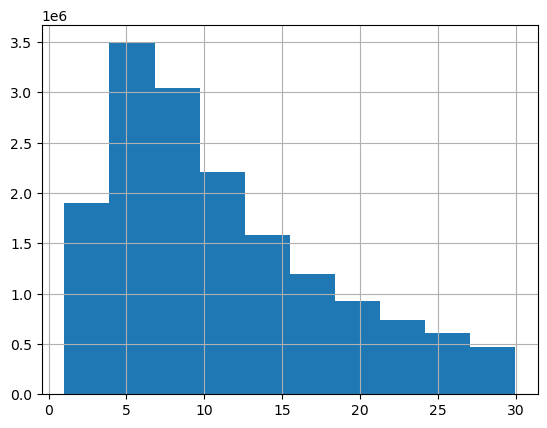

In [9]:
df[df.trip_minutes<30].trip_minutes.hist()
len(df[df.trip_minutes<30])

distribution of less than 60 mins

17381946

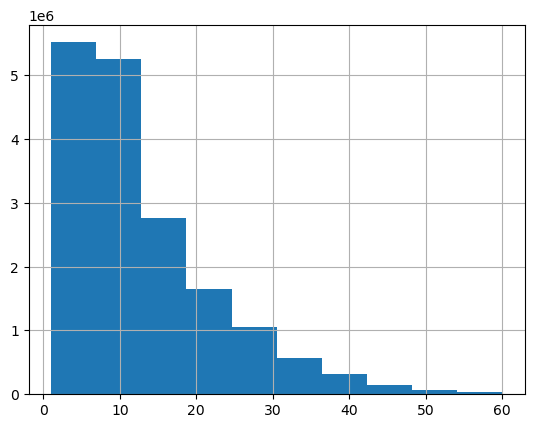

In [10]:
df[df.trip_minutes<60].trip_minutes.hist()
len(df[df.trip_minutes<60])

distribution of less than 24 hours

17543815


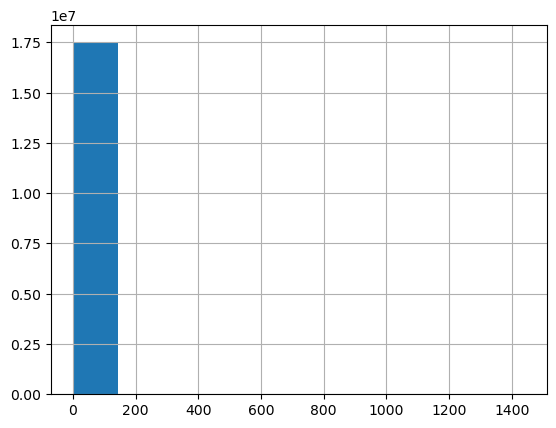

In [12]:
df[df.trip_minutes<1440].trip_minutes.hist()
onedaytd=len(df[df.trip_minutes<1440])
print(onedaytd)

trip duration after one day 3564 mins


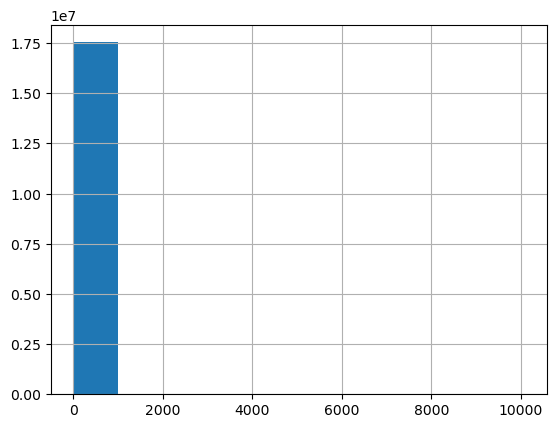

In [13]:
df[df.trip_minutes<10080].trip_minutes.hist()
sevendaystd=len(df[df.trip_minutes<10080])
#print(sevendaystd)
print("trip duration after one day" ,sevendaystd-onedaytd, "mins")

tripduration more than 7 days: 822  mins


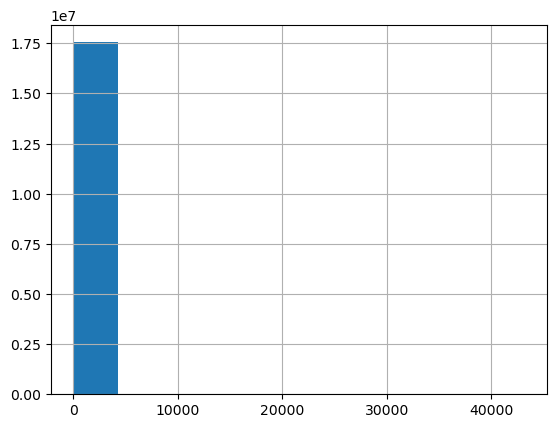

In [14]:
df[df.trip_minutes<43200].trip_minutes.hist()
thirtydaystd=len(df[df.trip_minutes<43200])
print("tripduration more than 7 days:",thirtydaystd-sevendaystd," mins")

trip duration more than 30 days: 138 mins


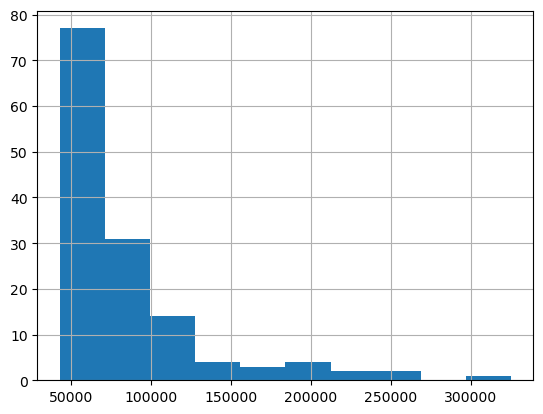

In [15]:
df[df.trip_minutes>43200].trip_minutes.hist()
print("trip duration more than 30 days:", len(df[df.trip_minutes>43200]),"mins")

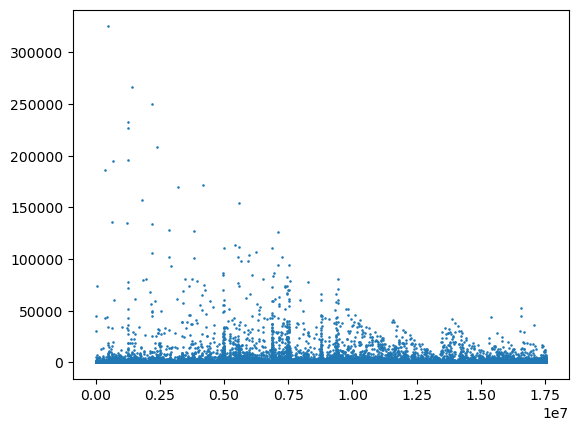

In [17]:
import matplotlib.pyplot as plt
plt.scatter(range(len(df.trip_minutes)),df.trip_minutes,s=0.7)
plt.xlabel('number of data points')
plt.show()

# Visualisation of the station ids

In [118]:
dfff = df.drop_duplicates(subset=['start_station_longitude', 'start_station_latitude', 'end_station_longitude', 'end_station_latitude'])

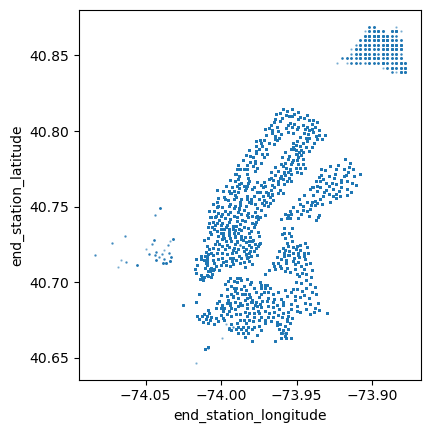

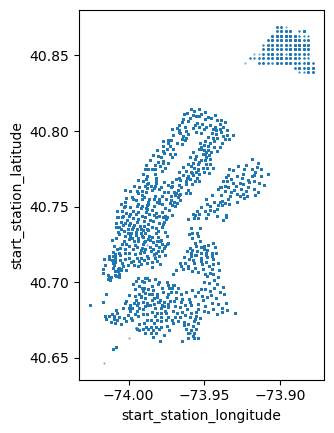

In [121]:
dfff = dfff.query('end_station_longitude < -73.8 and end_station_latitude < 41')
dfff.plot.scatter(x='end_station_longitude', y='end_station_latitude',s=0.4, alpha=0.5).set_aspect('equal')
dfff.plot.scatter(x='start_station_longitude', y='start_station_latitude',s=0.4, alpha=0.5).set_aspect('equal')

It can be seen as the map of new york.

# Gender

number of males:  11971322
number of females:  4092462
number of unknowns:  1484555
percentage of males from known:  74.5236738741009  %
percentage of females from known:  9.241627003948759  %
percentage of unknown data :  8.45980351758648  %


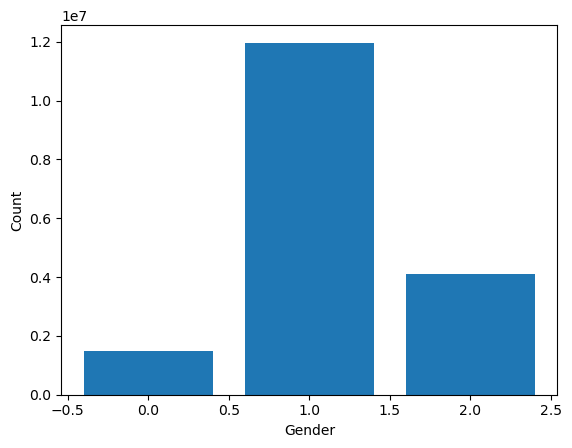

In [18]:
males=df['gender'].value_counts()[1]
females=df['gender'].value_counts()[2]
unknown=df['gender'].value_counts()[0]

print("number of males: ",df['gender'].value_counts()[1])
print("number of females: ",df['gender'].value_counts()[2])
print("number of unknowns: ",df['gender'].value_counts()[0])

print("percentage of males from known: ",(df['gender'].value_counts()[1]/(df['gender'].value_counts()[1]+ df['gender'].value_counts()[2]))*100," %")

print("percentage of females from known: ",(df['gender'].value_counts()[0]/(df['gender'].value_counts()[1]+ df['gender'].value_counts()[2]))*100," %")

print("percentage of unknown data : ",(df['gender'].value_counts()[0]/(df['gender'].value_counts()[0]+df['gender'].value_counts()[1]+ df['gender'].value_counts()[2]))*100," %")

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Assuming 'gender' column contains categorical data like 'male', 'female', 'unknown'
gender_counts = df['gender'].value_counts()

# Create a bar chart to visualize the distribution of genders
plt.bar(gender_counts.index, gender_counts.values)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


# Birth

oldest rider age:  133
youngest rider age:  16


,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,trip_minutes
2787,2787,944,2018-01-27 11:41:22.7260,2018-01-27 11:57:06.8930,82.0,40.711174,-74.000165,2008.0,40.705693,-74.016777,19760,Subscriber,1900,1,15.733333
14413,14413,595,2018-01-27 17:14:29.9340,2018-01-27 17:24:24.9360,151.0,40.722104,-73.997249,368.0,40.730386,-74.002150,14958,Subscriber,1918,1,9.916667
14489,14489,518,2018-01-28 14:32:51.2550,2018-01-28 14:41:29.2800,151.0,40.722104,-73.997249,361.0,40.716059,-73.991908,33390,Subscriber,1918,1,8.633333
17277,17277,663,2018-01-16 18:13:56.2490,2018-01-16 18:24:59.9440,161.0,40.729170,-73.998102,152.0,40.714740,-74.009106,31117,Subscriber,1912,0,11.050000
17404,17404,844,2018-01-18 16:04:22.0420,2018-01-18 16:18:26.8830,161.0,40.729170,-73.998102,534.0,40.702551,-74.012723,21654,Subscriber,1912,0,14.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17543778,17543778,523,2018-12-31 14:03:27.3290,2018-12-31 14:12:10.7260,3414.0,40.680945,-73.975673,3673.0,40.677592,-73.955637,33166,Subscriber,1895,1,8.716667
17544295,17544295,417,2018-12-31 14:25:45.6910,2018-12-31 14:32:43.4210,297.0,40.734232,-73.986923,3711.0,40.729667,-73.980680,35117,Subscriber,1890,2,6.950000
17546200,17546200,192,2018-12-31 16:11:30.2290,2018-12-31 16:14:43.2250,545.0,40.736502,-73.978095,487.0,40.733143,-73.975739,16285,Subscriber,1900,1,3.200000
17546343,17546343,626,2018-12-31 16:22:31.2100,2018-12-31 16:32:57.4530,267.0,40.750977,-73.987654,380.0,40.734011,-74.002939,35147,Subscriber,1917,1,10.433333


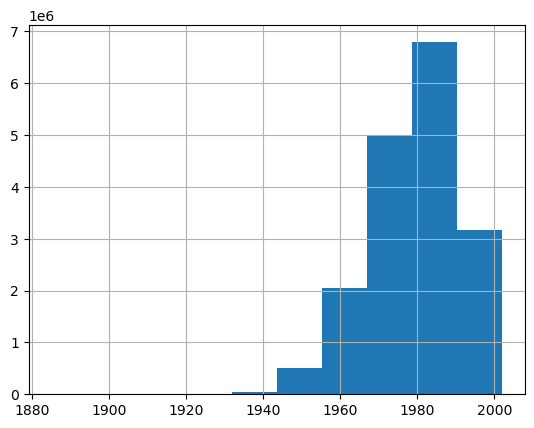

In [19]:
df.birth_year.hist()
year=2018
print("oldest rider age: ", year-df.birth_year.min())
print("youngest rider age: ", year-df.birth_year.max())

min_birth_year = df['birth_year'].min()
df[df['birth_year'] == min_birth_year]
df[df['birth_year'] <1920]

# User type

In [20]:
subs=df.usertype.value_counts()['Subscriber']

cus=df.usertype.value_counts()['Customer']

total=subs+cus

print("percentage of subscriber: ", subs/total," %")
print("percentage of customer: ", cus/total," %")

percentage of subscriber:  0.8898178340411591  %
percentage of customer:  0.1101821659588409  %


# datetime

In [21]:
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

df['start_date'] = df['starttime'].dt.date
df['stop_date'] = df['stoptime'].dt.date


In [22]:
df['starttime'].dt.month.value_counts().sort_index()

1      718994
2      843114
3      976672
4     1307543
5     1824710
6     1953103
7     1913625
8     1977177
9     1877884
10    1878657
11    1260355
12    1016505
Name: starttime, dtype: int64

In [23]:
names_list=df['starttime'].dt.month.value_counts().sort_index().index.values
values_list=df['starttime'].dt.month.value_counts().sort_index().values
print(names_list)
print(values_list)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 718994  843114  976672 1307543 1824710 1953103 1913625 1977177 1877884
 1878657 1260355 1016505]


Text(0.5, 1.0, 'Rides per month')

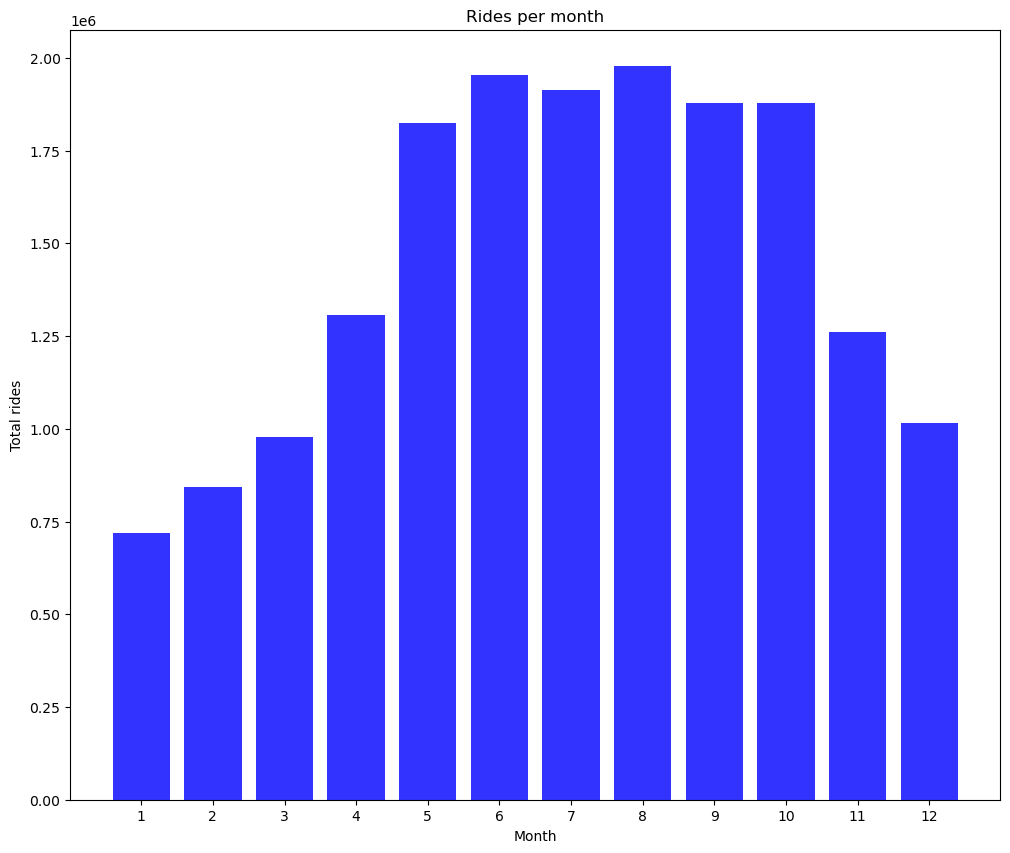

In [24]:
import numpy as np
fig,ax=plt.subplots(figsize=(12,10))
plt.bar(np.arange(len(values_list)),values_list,align='center',alpha=0.8,color='blue')
plt.xticks(np.arange(len(names_list)),names_list)
plt.ylabel('Total rides')
plt.xlabel('Month')
plt.title('Rides per month')

Higher Trip duration in the months the months of May , June , July , August , September and October.
Could be due to the warmer weather conditions as compared to the other colder months.

In [25]:
df['starttime'].dt.hour.value_counts().sort_index()

0      153529
1       85853
2       50145
3       31128
4       32763
5      113229
6      382833
7      807766
8     1412674
9     1111877
10     786065
11     826532
12     956564
13    1000809
14    1019691
15    1073021
16    1252798
17    1707105
18    1626014
19    1131276
20     770210
21     543730
22     404767
23     267960
Name: starttime, dtype: int64

In [26]:
hname_list=df['starttime'].dt.hour.value_counts().sort_index().index.values
hvalue_list=df['starttime'].dt.hour.value_counts().sort_index().values
print(hvalue_list)

[ 153529   85853   50145   31128   32763  113229  382833  807766 1412674
 1111877  786065  826532  956564 1000809 1019691 1073021 1252798 1707105
 1626014 1131276  770210  543730  404767  267960]


Text(0.5, 1.0, 'hours vs rides')

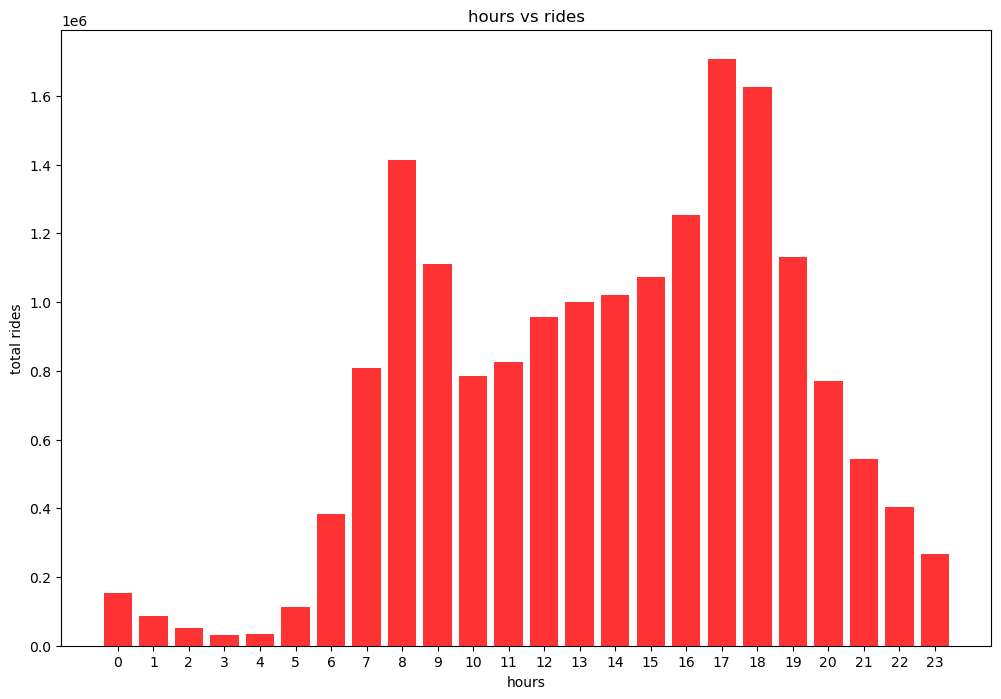

In [27]:
fig,ax=plt.subplots(figsize=(12,8))
plt.bar(np.arange(len(hvalue_list)),hvalue_list,align='center',alpha=0.8,color='red')
plt.xticks(np.arange(len(hname_list)),hname_list)
plt.ylabel('total rides')
plt.xlabel('hours')
plt.title('hours vs rides')

Higher trip durations during peak hours from 8 am to 9 am and 5pm to 6 pm

Trip Duration (seconds)
Start time and date
Stop time and date
Start station name
End station name
Station ID
Customer(Subscriber/Customer)
Gender( 0: Unknown, 1: male, 2:female)

In [95]:
print(len(df['start_station_id'].unique()))

print(len(df['end_station_id'].unique()))
print(len(df['bikeid'].unique()))

819
851
15244


# Section 2 - Prediction Challenge:

For now we have used a k-means for the clustering

# Clustering 

latitude, longitude ( x, y coordinates) 
Identiy number of cluster needed- elbow diagram
plot clusters


In [28]:
start_coordinates=df[['start_station_latitude','start_station_longitude']]
end_coordinates=df[['end_station_latitude','end_station_longitude']]

In [29]:
from sklearn.cluster import KMeans

In [31]:
kmeans=KMeans(n_clusters=20,random_state=20)

In [32]:
kmeans.fit(start_coordinates)

KMeans(n_clusters=20, random_state=20)

In [33]:
df['start_coordinates_cluster']=kmeans.labels_

Pick up demands can be seen by looking at the start coordinates since this will be used for to predict the furture demand.

In [34]:
df.head()

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,trip_minutes,start_date,stop_date,start_coordinates_cluster
0,0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1,16.166667,2018-01-01,2018-01-01,14
1,1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1,12.050000,2018-01-01,2018-01-01,14
2,2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1,8.266667,2018-01-01,2018-01-01,14
3,3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1,5.100000,2018-01-01,2018-01-01,14
4,4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1,5.100000,2018-01-01,2018-01-01,14


In [52]:
df['starttime'].dt.day.count()
df['date']=df['starttime'].dt.date
df.head(10)

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,trip_minutes,start_date,stop_date,start_coordinates_cluster,date
0,0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1,16.166667,2018-01-01,2018-01-01,14,2018-01-01
1,1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1,12.050000,2018-01-01,2018-01-01,14,2018-01-01
2,2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1,8.266667,2018-01-01,2018-01-01,14,2018-01-01
3,3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1,5.100000,2018-01-01,2018-01-01,14,2018-01-01
4,4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1,5.100000,2018-01-01,2018-01-01,14,2018-01-01
5,5,1602,2018-01-01 21:31:54.192,2018-01-01 21:58:36.353,72.0,40.767272,-73.993929,482.0,40.739355,-73.999318,30106,Subscriber,1968,1,26.700000,2018-01-01,2018-01-01,14,2018-01-01
6,6,722,2018-01-02 07:54:53.646,2018-01-02 08:06:55.872,72.0,40.767272,-73.993929,228.0,40.754601,-73.971879,32059,Subscriber,1978,1,12.033333,2018-01-02,2018-01-02,14,2018-01-02
7,7,434,2018-01-02 08:06:14.331,2018-01-02 08:13:28.767,72.0,40.767272,-73.993929,173.0,40.760683,-73.984527,30525,Subscriber,1983,1,7.233333,2018-01-02,2018-01-02,14,2018-01-02
8,8,366,2018-01-02 08:10:15.255,2018-01-02 08:16:21.896,72.0,40.767272,-73.993929,479.0,40.760193,-73.991255,27439,Subscriber,1974,1,6.100000,2018-01-02,2018-01-02,14,2018-01-02
9,9,324,2018-01-02 08:13:30.896,2018-01-02 08:18:55.120,72.0,40.767272,-73.993929,450.0,40.762272,-73.987882,30892,Subscriber,1947,1,5.400000,2018-01-02,2018-01-02,14,2018-01-02


most number of pickups:  1661056  at cluster:  1
most demand in cluster  1


<BarContainer object of 20 artists>

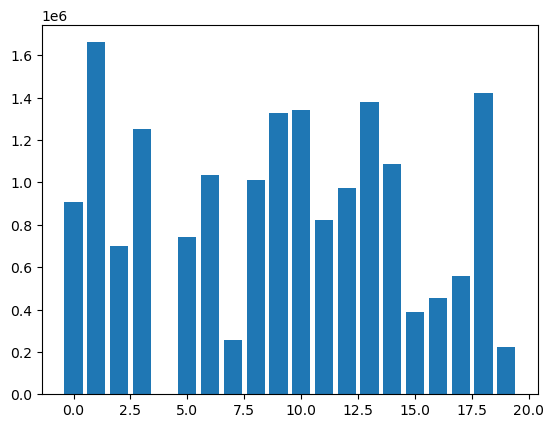

In [86]:
print('most number of pickups: ',df['start_coordinates_cluster'].value_counts().sort_index().max(),' at cluster: ',df['start_coordinates_cluster'].value_counts().idxmax())
print('most demand in cluster ', df['start_coordinates_cluster'].value_counts().idxmax())
values_listt=df['start_coordinates_cluster'].value_counts().sort_index().values
index_listt=df['start_coordinates_cluster'].value_counts().sort_index().index

plt.bar(range(len(index_listt)),values_listt)

# most occurrences in cluster label used to see which cluster has most picksup according to start_time coordinates

Can be seen from the graph , cluster 1 shows the highest number of pickups

In [92]:
cluster1_data=df[df['start_coordinates_cluster']==1]
print("number of occurrences in cluster 1:",len(cluster1_data))
cluster1_data

number of occurrences in cluster 1: 1661056


,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,trip_minutes,start_date,stop_date,start_coordinates_cluster,date
27868,27868,314,2018-01-01 03:59:54.496,2018-01-01 04:05:09.049,174.0,40.738177,-73.977387,527.0,40.744023,-73.976056,19680,Subscriber,1988,2,5.233333,2018-01-01,2018-01-01,1,2018-01-01
27869,27869,246,2018-01-01 10:17:50.017,2018-01-01 10:21:56.715,174.0,40.738177,-73.977387,491.0,40.740964,-73.986022,28574,Subscriber,1975,1,4.100000,2018-01-01,2018-01-01,1,2018-01-01
27870,27870,1267,2018-01-01 11:34:04.432,2018-01-01 11:55:12.049,174.0,40.738177,-73.977387,161.0,40.729170,-73.998102,19692,Subscriber,1980,2,21.116667,2018-01-01,2018-01-01,1,2018-01-01
27871,27871,1263,2018-01-01 13:00:32.442,2018-01-01 13:21:36.081,174.0,40.738177,-73.977387,3288.0,40.778301,-73.948813,31282,Subscriber,1995,1,21.050000,2018-01-01,2018-01-01,1,2018-01-01
27872,27872,973,2018-01-01 15:56:18.426,2018-01-01 16:12:31.828,174.0,40.738177,-73.977387,311.0,40.717227,-73.988021,31579,Subscriber,1989,2,16.216667,2018-01-01,2018-01-01,1,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548260,17548260,456,2018-12-31 22:50:57.840,2018-12-31 22:58:34.639,3463.0,40.735367,-73.987974,3660.0,40.741022,-74.001385,34137,Subscriber,1955,2,7.600000,2018-12-31,2018-12-31,1,2018-12-31
17548264,17548264,557,2018-12-31 22:55:40.778,2018-12-31 23:04:57.886,528.0,40.742909,-73.977061,3680.0,40.754121,-73.980252,30153,Subscriber,1987,1,9.283333,2018-12-31,2018-12-31,1,2018-12-31
17548281,17548281,1118,2018-12-31 23:10:04.187,2018-12-31 23:28:42.865,497.0,40.737050,-73.990093,518.0,40.747804,-73.973442,32348,Subscriber,1949,1,18.633333,2018-12-31,2018-12-31,1,2018-12-31
17548288,17548288,849,2018-12-31 23:15:39.911,2018-12-31 23:29:49.834,474.0,40.745168,-73.986831,281.0,40.764397,-73.973715,29995,Subscriber,1961,1,14.150000,2018-12-31,2018-12-31,1,2018-12-31


In [113]:
cluster1_data['bikeid'].values

array([19680, 28574, 19692, ..., 32348, 29995, 34089], dtype=int64)

age group of people in cluster 1 - min , max , mean
gender ratio in cluster 1 

month wise pickups distribution of cluster 1 
hour wise pickups distribution of cluster 1

trip duration , min ,max , mean 
user type distribution for cluster 1 


In [56]:
pickups_per_day=df.groupby('date')['starttime'].count().reset_index()

print(pickups_per_day)

           date  starttime
0    2018-01-01       5500
1    2018-01-02      18818
2    2018-01-03      24299
3    2018-01-04       1922
4    2018-01-05       4972
..          ...        ...
360  2018-12-27      30879
361  2018-12-28      11921
362  2018-12-29      28788
363  2018-12-30      22329
364  2018-12-31      18763

[365 rows x 2 columns]


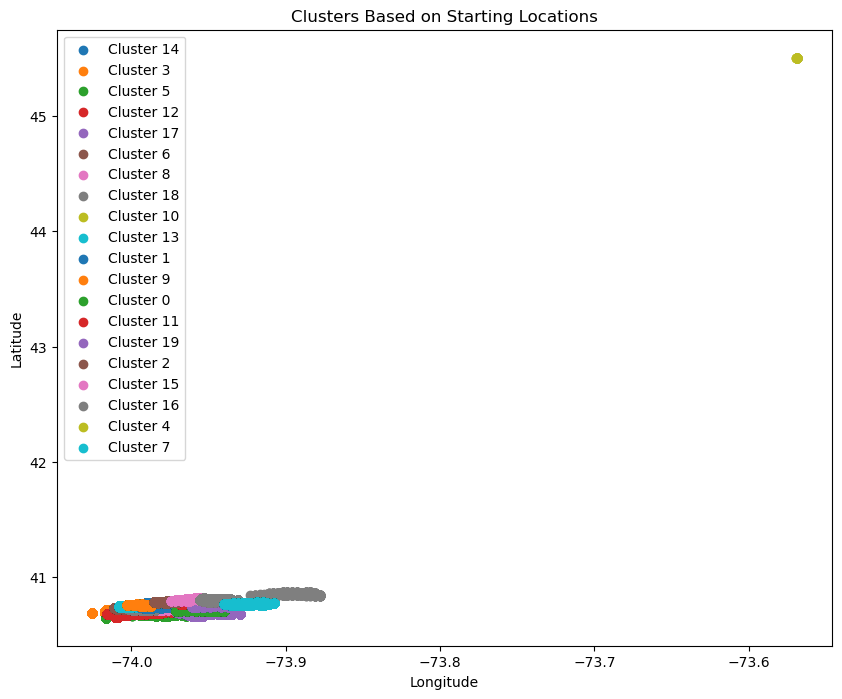

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame 'df' with cluster labels and start coordinates
# df should have columns 'start station longitude', 'start station latitude', and 'cluster'

# Scatter plot with different colors for each cluster
plt.figure(figsize=(10, 8))

# Loop through each cluster and plot points
for cluster in df['start_coordinates_cluster'].unique():
    cluster_data = df[df['start_coordinates_cluster'] == cluster]
    plt.scatter(cluster_data['start_station_longitude'], cluster_data['start_station_latitude'], label=f'Cluster {cluster}')

# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters Based on Starting Locations')
plt.legend()
plt.show()


The scatter plot for clustering needs improvement but due to lack of time and computation power this is what we came up with. This was done for use to understand not to showcase resultls.

# Section 3 - Exploratory Component:

Here we some different ideas (We are not sure what to chose yet):

One idea would be to examine how weather conditions, particularly precipitation, affects Citi Bike ridership in New York. By extending the dataset with weather data, we would aim to determine if there is a correlation between precipitation and the number of bike rides. This analysis will provide insights into whether rainy days discourage users from utilizing the bike-sharing system.

Another idea would be to build a decision tree model to predict bike usage likelihood based on user demographics, including gender, age, and subscription status. The model will classify users into usage categories, helping identify demographic factors that influence bike usage.

# Section 4 - Conclusions:

No conclusions yet

Progress so far (milestone1):

We showed a short introduction of the data as well as some visualization for the different features. We found some interesting inferences from the data such as the demographic and trip durations over months/hours.

We began the predictive section by performing clustering. Initially started offtrying to figure out the ideal k value using the elmow graph, but due to lack of computation power ,we could not complete it. 
We use the k value as 20 ( as specified in the project descriptions) directly and identified 20 clusters and found that cluster 1 had the highest trip duration.

Note: More work needs to be done in the exploratory section.
Data cleaning was not really required so far.
The data should also be cleaned a bit more ( remove outliers and missing values) before the predictive section is done further.
